In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

fight_stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_knn_reg(X_columns, y_columns, data, n=5)
    set_predictions(mo

SyntaxError: invalid syntax (<ipython-input-1-00b0f6224fe5>, line 1)

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [2]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,win,Aleksandra Albu,Kailin Curran,2017-07-29,Women's Strawweight,U-DEC:,0.007043,-0.13660,1.572182,0.000126,0.146611,-0.234918,0.536244,-0.191655,0.609627,0.331825,0.489153,-1.247508,-0.017271,2.039564,0.562079,-2.148820
6729,lose,Eric Shelton,Jarred Brooks,2017-07-29,Flyweight,S-DEC:,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820


In [3]:
req_data = ['date','fighter','opponent','result']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = ['td avg._dif',
     'td acc._dif',
     'td def._dif',
     'sub. avg._dif',
     'slpm_dif',
     'str. acc._dif',
     'sapm_dif',
     'str. def_dif',
     'stance_win_ratio',
     'win_perc_dif',
     'win_strk_dif',
     'lose_strk_dif']
df = df[req_data + y + X]
df.head(3)

,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2022-09-03,Ciryl Gane,Tai Tuivasa,win,0.007043,3.063020,-0.006803,0.000126,0.341736,0.744283,0.100671,0.475716,0.641259,0.737225,-1.220265,1.444073,-1.776060,0.378717,-2.870051,1.083053
1,2022-09-03,Marvin Vettori,Robert Whittaker,lose,0.007043,-1.529376,-0.401549,0.000126,0.592610,0.254682,-0.334902,0.571055,-0.162187,0.169665,0.190005,-0.154053,1.488122,-0.132313,0.562079,-1.071529
2,2022-09-03,Joaquin Buckley,Nassourdine Imavov,lose,0.007043,-0.174243,-0.796295,-1.694540,0.219086,0.254682,-0.334902,-2.289105,-0.282388,-1.776257,0.599045,-0.658725,1.488122,-0.106761,0.562079,0.005762


### <span style='color:green'> **[done]** </span>Feature's significanse:

---------------------------------------------
Correlation Report: Most significant features
---------------------------------------------
R coef > Median R: [0.19, 0.42, 0.26, 0.31, 0.28, 0.57, 0.18, 0.19, 0.39]
Most significant: ['sapm_dif', 'slpm_dif', 'str. acc._dif', 'str. def_dif', 'td def._dif', 'sub. avg._dif', 'td acc._dif', 'td avg._dif', 'td def._dif']


y,kd_dif,str_dif,sub_dif,td_dif
X,,,,
lose_strk_dif,0.05,0.04,0.0,0.0
sapm_dif,0.05,0.31,0.01,0.13
slpm_dif,0.17,0.42,0.03,0.04
stance_win_ratio,0.05,0.02,0.0,0.01
str. acc._dif,0.11,0.26,0.04,0.07
str. def_dif,0.09,0.28,0.06,0.11
sub. avg._dif,0.07,0.04,0.39,0.04
td acc._dif,0.05,0.15,0.01,0.18
td avg._dif,0.08,0.09,0.04,0.57


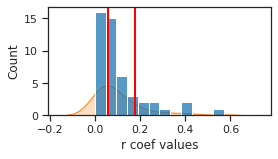

In [4]:
rdf = pd.DataFrame(columns=['y','X','r_coef'])
r_list = []
y_columns = ['kd_dif','str_dif','td_dif','sub_dif']
i = 0 
for y_column in y_columns:
    for x_column in X:
        rdf.loc[i, 'X'] = x_column
        rdf.loc[i, 'y'] = y_column
        rdf.loc[i, 'r_coef'] = np.round(np.abs(get_r_score(X=df[x_column], y=df[y_column])),2)
        r_list.append(rdf.loc[i, 'r_coef'])
        i += 1

rdf = rdf.pivot('X','y','r_coef')
print('---------------------------------------------')
print('Correlation Report: Most significant features')
print('---------------------------------------------')

sig_r =  [r for r in r_list if (r > (np.median(r_list)+np.std(r_list)) and r < 1)]
sig_features = get_sig_features(data=rdf, sig_r=sig_r)
print('R coef > Median R: %s' %(sig_r))
print('Most significant: %s' %(sig_features) )

g = plt.figure(figsize=(4,2))
g = sns.histplot(x = r_list, bins=len(rdf))
g = sns.kdeplot(x = r_list, fill=True)
plt.axvline(x = np.median(r_list)+np.std(r_list), color='red')
plt.axvline(x = np.median(r_list), color='red')
plt.xlabel("r coef values")
plt.ylabel("Count")

rdf

### <span style='color:green'> **[done]** </span> KNN regression model training:

#### <span style='color:green'> **[done]** </span> splitting data:

In [5]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.3, valid_size=0.3)
df.tail(3)

Data split: Data=(6731, 21), train_set=(3354, 12), validation_set=(1422, 12), test_set=(1955, 12)


,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.007043,-0.13660,1.572182,0.000126,0.146611,-0.234918,0.536244,-0.191655,0.609627,0.331825,0.489153,-1.247508,-0.017271,2.039564,0.562079,-2.148820
6729,validation,2017-07-29,Eric Shelton,Jarred Brooks,lose,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820


#### <span style='color:green'> **[done]** </span> KNN reg Parameter Tunning:

In [6]:
knn_grad = pd.DataFrame(columns=['neighbors','kd_dif rmse','str_dif rmse','td_dif rmse','sub_dif rmse','total_rmse'])

for n in tqdm(np.arange(1,30,2)):
    knn_grad = pd.concat([knn_grad,get_grad_descent_step(alpha=0.01, X_columns=X, y_columns=y, data=df, n=n)], ignore_index=True)

knn_grad

100%|██████████| 15/15 [00:17<00:00,  1.17s/it]


,neighbors,kd_dif rmse,str_dif rmse,td_dif rmse,sub_dif rmse,total_rmse
0,1,0.1149,0.1212,0.1069,0.1056,0.4486
1,3,0.0919,0.0987,0.0878,0.0881,0.3665
2,5,0.0860,0.0924,0.0836,0.0838,0.3458
3,7,0.0842,0.0897,0.0819,0.0822,0.3380
4,9,0.0827,0.0884,0.0810,0.0811,0.3332
5,11,0.0816,0.0875,0.0803,0.0805,0.3299
6,13,0.0808,0.0865,0.0799,0.0800,0.3272
7,15,0.0803,0.0856,0.0796,0.0795,0.3250
8,17,0.0798,0.0851,0.0792,0.0792,0.3233
9,19,0.0797,0.0851,0.0787,0.0789,0.3224


In [7]:
df.tail(3)

,set,date,fighter,opponent,result,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6728,test,2017-07-29,Aleksandra Albu,Kailin Curran,win,0.007043,-0.13660,1.572182,0.000126,0.146611,-0.234918,0.536244,-0.191655,0.609627,0.331825,0.489153,-1.247508,-0.017271,2.039564,0.562079,-2.148820,0.100456,0.100456,0.100456,0.100456
6729,validation,2017-07-29,Eric Shelton,Jarred Brooks,lose,0.007043,0.16454,-1.585788,0.000126,-0.957237,-0.199947,-0.770475,-0.382332,0.299636,-0.316816,0.128955,0.098283,0.076432,-0.004555,-0.009943,1.083053,0.147163,0.147163,0.147163,0.147163
6730,train,2017-07-29,Drew Dober,Joshua Burkman,win,1.361536,0.16454,-0.006803,0.000126,-0.996262,-0.654576,-0.602947,-0.191655,1.141041,-0.235736,0.623465,0.014171,1.488122,0.123202,-0.009943,-2.148820,0.427403,0.427403,0.427403,0.427403


<AxesSubplot:xlabel='neighbors', ylabel='total_rmse'>

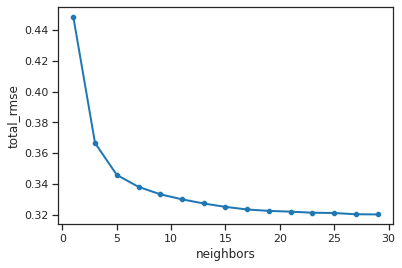

In [8]:
sns.scatterplot(data=knn_grad, x='neighbors', y='total_rmse')
sns.lineplot(data=knn_grad, x='neighbors', y='total_rmse')

In [9]:
opt_n = np.min(knn_grad.neighbors[knn_grad.total_rmse==np.min(knn_grad.total_rmse)])
print('best performance n: %d' %opt_n)
knn_grad[knn_grad.total_rmse==np.min(knn_grad.total_rmse)]

best performance n: 29


,neighbors,kd_dif rmse,str_dif rmse,td_dif rmse,sub_dif rmse,total_rmse
14,29,0.0795,0.0844,0.0782,0.078,0.3201


### <span style='color:green'> **[done]** </span> Model evaluation:

In [10]:
rmse = 0
for stat in ['kd','str','td','sub']:
    rmse += get_rmse(act=df[stat + '_dif'][df.set=='test'], pred=df[stat + '_dif_pred'][df.set=='test'])
print('Model Accuracy: %f' %(1-rmse))    

Model Accuracy: 0.629700


#### <span style='color:green'> **[done]** </span> Saving data:

In [11]:
param = pd.DataFrame(data={'ml_model':['knn_reg'],
                          'parameter_name':['neighbors'],
                          'value':[opt_n],
                          'accuracy':[1-rmse]}
                    )

param.to_csv('../global_variables/ml_models_parameters.csv')
print('../global_variables/ml_models_parameters.csv saved.')

../global_variables/ml_models_parameters.csv saved.


In [12]:
df.to_csv('../data/fight_stat_data_trained.csv')
print('../data/fight_stat_data_trained.csv saved.')

../data/fight_stat_data_trained.csv saved.
